# Описание данных

### У нас есть dataset  американского интернет магазина,  который нужно проанализировать

## Файл "sales.csv"

* **Row ID** - ID товара
* **Order ID** - ID заказа
* **Order Date** - Дата заказа
* **Ship Date** - Дата отгрузки
* **Ship Mode** - Транспортировочный режим
* **Customer ID** - ID клиента
* **Customer Name** - Имя клиенат
* **Segment** - Сегмент
* **Country** - Страна
* **City** - Город
* **State** - Штат
* **Postal Code** - Почтовый индекс
* **Region** - Регион
* **Product ID** - ID продукта
* **Category** - Категория
* **Sub-Category** - Подкатегория
* **Product Name** - Наименование товара
* **Sales** - Продажи



## Этапы:

1. [№1 Загрузить данные и библиотеки](#section_date1)
2. [№2 Предобработка данных](#section_date2)
3. [№3 Исследовательский этап](#section_date3)










# №1 Загрузим данные и библиотеки <a id='section_date1'></a>

In [184]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandasql as ps

from datetime import datetime

from pandasql import sqldf


In [185]:
df = pd.read_csv(r'C:\Users\Leonid\Desktop\sales.csv', index_col='Row ID') 
df.head(5) # Проверим отображение данных 

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
Row ID,,,,,,,,,,,,,,,,,
1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


# №2 Предобработка данных <a id='section_date2'></a>

In [186]:
df.dtypes

Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code      float64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
dtype: object

In [187]:
df['Order Date'] = pd.to_datetime(df['Order Date']) # Изменим тип данных с obgect на datetaime для дальнейшей работы

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '15/04/2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '22/11/2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '13/05/2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '27/08/2015' in DD/MM/YYYY format. Provide format or specif

In [188]:
df.dtypes # Выведим информацию  по типу данных, которые используют в строках

Order ID                 object
Order Date       datetime64[ns]
Ship Date                object
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code             float64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
dtype: object

In [189]:
# Добавим столбцы day, month, year для дальнейшей работы 
df['day'] = (df['Order Date']).dt.day
df['month'] = (df['Order Date']).dt.month
df['year'] = (df['Order Date']).dt.year

In [190]:
df.info() # Выведим более детальную информацию по типу данных столбцов 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9800 entries, 1 to 9800
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       9800 non-null   object        
 1   Order Date     9800 non-null   datetime64[ns]
 2   Ship Date      9800 non-null   object        
 3   Ship Mode      9800 non-null   object        
 4   Customer ID    9800 non-null   object        
 5   Customer Name  9800 non-null   object        
 6   Segment        9800 non-null   object        
 7   Country        9800 non-null   object        
 8   City           9800 non-null   object        
 9   State          9800 non-null   object        
 10  Postal Code    9789 non-null   float64       
 11  Region         9800 non-null   object        
 12  Product ID     9800 non-null   object        
 13  Category       9800 non-null   object        
 14  Sub-Category   9800 non-null   object        
 15  Product Name   9800 n

In [191]:
df.shape # <у нас 9800 строк и 20 столбцов>

(9800, 20)

In [192]:
df.columns.tolist  # Узнаем название столбцов 

<bound method IndexOpsMixin.tolist of Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Sales', 'day', 'month', 'year'],
      dtype='object')>

In [193]:
colms_column = [
    
    'Order_ID',
    'Order_Date',
    'Ship_Date',
    'Ship_Mode',
    'Customer_ID',
    'Customer_Name',
    'Segment',
    'Country',
    'City',
    'State',
    'Postal_Code',
    'Region',
    'Product_ID',
    'Category',
    'Sub_Category',
    'Product_Name',
    'Sales',
    'day',
    'month',
    'year'
    

    
]

df.set_axis(colms_column, axis='columns', inplace=True) # Переименуем название столбцов для дальнейшей работы с SQL запросами

In [194]:
df.duplicated().sum() # Проверим дубликаты 

1

In [195]:
df.isna().sum()   # Подсчитаем сколько пустых строк у нас есть и где

Order_ID          0
Order_Date        0
Ship_Date         0
Ship_Mode         0
Customer_ID       0
Customer_Name     0
Segment           0
Country           0
City              0
State             0
Postal_Code      11
Region            0
Product_ID        0
Category          0
Sub_Category      0
Product_Name      0
Sales             0
day               0
month             0
year              0
dtype: int64

In [196]:
df['Postal_Code'] = df['Postal_Code'].fillna(0) # Заменим пустые строки числом 0

In [197]:
df.isna().sum() # Порверим

Order_ID         0
Order_Date       0
Ship_Date        0
Ship_Mode        0
Customer_ID      0
Customer_Name    0
Segment          0
Country          0
City             0
State            0
Postal_Code      0
Region           0
Product_ID       0
Category         0
Sub_Category     0
Product_Name     0
Sales            0
day              0
month            0
year             0
dtype: int64

In [198]:

df.describe().round(2)  # Оценим столбцы, round уберем лишние значения после запятой 

,Postal_Code,Sales,day,month,year
count,9800.00,9800.00,9800.00,9800.00,9800.00
mean,55211.28,230.77,16.12,7.19,2016.72
std,32076.68,626.65,8.07,3.42,1.12
min,0.00,0.44,1.00,1.00,2015.00
25%,23223.00,17.25,10.00,4.00,2016.00
50%,57551.00,54.49,16.00,8.00,2017.00
75%,90008.00,210.60,23.00,10.00,2018.00
max,99301.00,22638.48,31.00,12.00,2018.00


In [199]:
df.head() 

,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales,day,month,year
Row ID,,,,,,,,,,,,,,,,,,,,
1,CA-2017-152156,2017-08-11,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,11,8,2017
2,CA-2017-152156,2017-08-11,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,11,8,2017
3,CA-2017-138688,2017-12-06,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,6,12,2017
4,US-2016-108966,2016-11-10,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,10,11,2016
5,US-2016-108966,2016-11-10,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,10,11,2016


# Вывод 

* Провели первичный осмотр данных 
* Привели в правильный вид тип данных в столбце 'Order data'
* Добавили столбцы 'day', 'month', 'year'
* Удалили пустые строки
* Посмотрели дубли, дубли связаны с индексом, так что все норм  
* Переименовали название столбцов для дальнейшей работы с SQL запросами  


# №3 Исследовательский этап <a id='section_date3'></a>

## Информация которую нужно найти:


## [Дата](#section_id) 

* Статистика выручки по годам 
* Прибыль по месяцам за 2015-2018 год
* Сколько заказов в год
* Сколько заказов по месяцам за 2015-2018 год
   
## [Транспортировочный режим](#section_id1)

* Какой транспортировочный режим больше всего пользуется спросом 
* Вывести данные по всем классам  

## [Клиент](#section_id2)

* Сколько всего уникальных клиентов 
* Сколько уникальных клиентов по штатм  

## [Сегмент](#section_id3)

* Какие сегменты заказывают чаще всего 
* Сколько заказов по сегментам  

## [Штат](#section_id4)

* Прибыль по штатам 

## [Категория](#section_id5)

* Какая категория самая прибыльная 
* Вся статистика по категориям  

## [Товар](#section_id6)

* Сколько всего товаров продано
* Сколько уникальных товаров

## [Продажи](#section_id7)

* итоговая выручка 

# ДАТА <a id='section_id'></a>

In [200]:
df.groupby(['year']).agg({'Sales': 'sum'})

,Sales
year,
2015,479856.2081
2016,459436.0054
2017,600192.5500
2018,722052.0192


# Выведем данные с помощью SQL запросов 

In [201]:
# статистика выручки по годам 
sql = """SELECT year, SUM(sales) AS proceeds FROM df GROUP BY year 
    
"""
ysql = ps.sqldf(sql)
ysql



,year,proceeds
0,2015,479856.2081
1,2016,459436.0054
2,2017,600192.5500
3,2018,722052.0192


Text(0.5, 1.0, 'Выручка по годам')

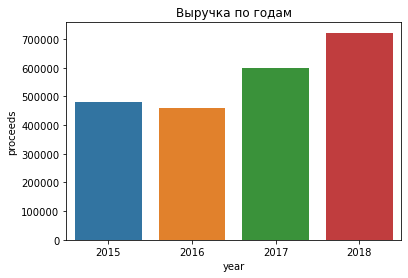

In [202]:
sns.barplot(x="year", y="proceeds", data=ysql).set_title('Выручка по годам')

In [203]:
# Прибыль по месяцам за 2015 год
sql1 = """
        SELECT  month, SUM(sales) AS proceeds  FROM df WHERE year = 2015 GROUP BY month 
"""

ysql1 = ps.sqldf(sql1)
ysql1

,month,proceeds
0,1,28828.2540
1,2,12588.4840
2,3,54027.6920
3,4,24710.0160
4,5,29520.4900
5,6,29181.3346
6,7,35194.5580
7,8,37349.2655
8,9,65956.3998
9,10,34561.9470


Text(0.5, 1.0, 'Выручка по месяцам за 2015')

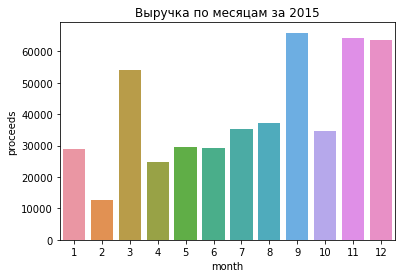

In [204]:
sns.barplot(x="month", y="proceeds", data=ysql1).set_title('Выручка по месяцам за 2015')

In [205]:
# Прибыль по месяцам за 2016 год
sql2 = """
        SELECT  month, SUM(sales) AS proceeds  FROM df WHERE year = 2016 GROUP BY month 
"""

ysql2 = ps.sqldf(sql2)
ysql2

,month,proceeds
0,1,29347.3864
1,2,20728.3520
2,3,34489.6776
3,4,38056.9685
4,5,30761.5585
5,6,28515.9082
6,7,28573.3100
7,8,49076.9300
8,9,65352.9970
9,10,31631.8890


Text(0.5, 1.0, 'Выручка по месяцам за 2016')

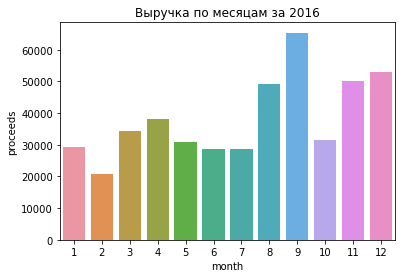

In [206]:
sns.barplot(x="month", y="proceeds", data=ysql2).set_title('Выручка по месяцам за 2016')

In [207]:
# Прибыль по месяцам за 2017 год
sql3 = """
        SELECT  month, SUM(sales) AS proceeds  FROM df WHERE year = 2017 GROUP BY month 
"""

ysql3 = ps.sqldf(sql3)
ysql3

,month,proceeds
0,1,38048.1840
1,2,48907.5900
2,3,48990.1410
3,4,42368.0480
4,5,64836.2518
5,6,37424.6810
6,7,41761.9430
7,8,45766.8144
8,9,40692.3063
9,10,52156.9580


Text(0.5, 1.0, 'Выручка по месяцам за 2017')

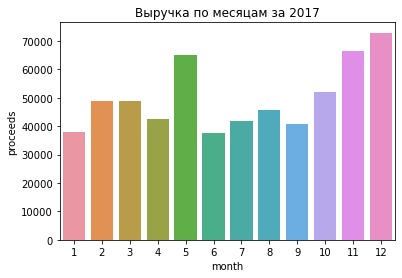

In [208]:
sns.barplot(x="month", y="proceeds", data=ysql3).set_title('Выручка по месяцам за 2017')

In [209]:
# Прибыль по месяцам за 2018 год
sql4 = """
        SELECT  month, SUM(sales) AS proceeds  FROM df WHERE year = 2018 GROUP BY month  
"""

ysql4 = ps.sqldf(sql4)
ysql4

,month,proceeds
0,1,59767.0910
1,2,48928.8334
2,3,74748.6238
3,4,37849.2156
4,5,40882.4464
5,6,46912.8475
6,7,53942.7755
7,8,75408.7840
8,9,73153.3640
9,10,65501.1622


Text(0.5, 1.0, 'Выручка по месяцам за 2018')

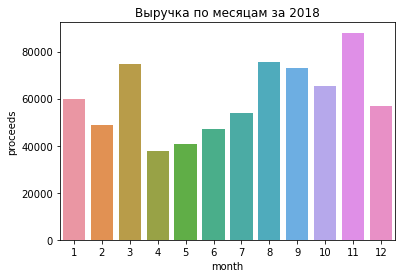

In [210]:
sns.barplot(x="month", y="proceeds", data=ysql4).set_title('Выручка по месяцам за 2018')

In [211]:
# сколько заказов в год 
order3 = """ SELECT year, COUNT(Product_ID) AS orders  FROM df GROUP BY year

"""

SUM_order3 = ps.sqldf(order3)
SUM_order3

,year,orders
0,2015,1953
1,2016,2055
2,2017,2534
3,2018,3258


Text(0.5, 1.0, 'Заказы по годам')

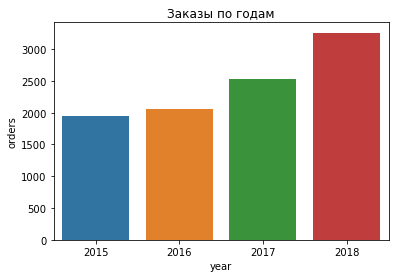

In [212]:
sns.barplot(x="year", y="orders", data=SUM_order3).set_title('Заказы по годам')

In [213]:
# сколько заказов в месяц за 2015
order4 = """ SELECT year, month, COUNT(Product_ID) AS orders  FROM df WHERE year = 2015 GROUP BY month

"""
SUM_order4 = ps.sqldf(order4)
SUM_order4

,year,month,orders
0,2015,1,126
1,2015,2,84
2,2015,3,161
3,2015,4,121
4,2015,5,146
5,2015,6,135
6,2015,7,154
7,2015,8,145
8,2015,9,238
9,2015,10,145


Text(0.5, 1.0, 'Заказы за 2015 по месяцам')

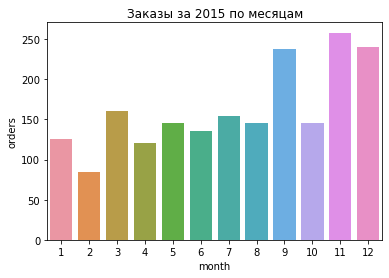

In [214]:
sns.barplot(x="month", y="orders", data=SUM_order4).set_title('Заказы за 2015 по месяцам')

In [215]:
# сколько заказов в месяц за 2016
order5 = """ SELECT year, month, COUNT(Product_ID) AS orders  FROM df WHERE year = 2016 GROUP BY month

"""
SUM_order5 = ps.sqldf(order5)
SUM_order5

,year,month,orders
0,2016,1,86
1,2016,2,102
2,2016,3,144
3,2016,4,159
4,2016,5,174
5,2016,6,149
6,2016,7,128
7,2016,8,170
8,2016,9,271
9,2016,10,153


Text(0.5, 1.0, 'Заказы за 2016 по месяцам')

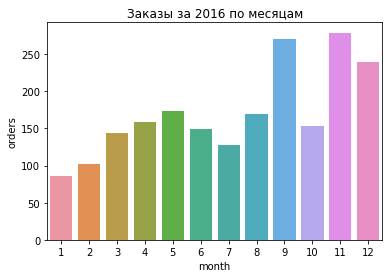

In [216]:
sns.barplot(x="month", y="orders", data=SUM_order5).set_title('Заказы за 2016 по месяцам')

In [217]:
# сколько заказов в месяц за 2017
order6 = """ SELECT year, month, COUNT(Product_ID) AS orders  FROM df WHERE year = 2017 GROUP BY month

"""
SUM_order6 = ps.sqldf(order6)
SUM_order6

,year,month,orders
0,2017,1,154
1,2017,2,122
2,2017,3,190
3,2017,4,186
4,2017,5,257
5,2017,6,180
6,2017,7,201
7,2017,8,236
8,2017,9,225
9,2017,10,231


Text(0.5, 1.0, 'Заказы за 2017 по месяцам')

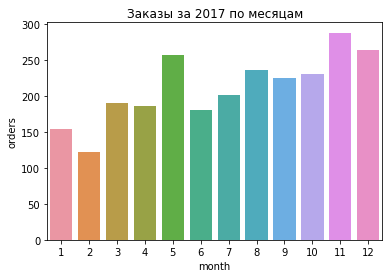

In [218]:
sns.barplot(x="month", y="orders", data=SUM_order6).set_title('Заказы за 2017 по месяцам')

In [219]:
# сколько заказов в месяц за 2018
order7 = """ SELECT year, month, COUNT(Product_ID) AS orders  FROM df WHERE year = 2018 GROUP BY month

"""

SUM_order7 = ps.sqldf(order7)
SUM_order7

,year,month,orders
0,2018,1,209
1,2018,2,228
2,2018,3,302
3,2018,4,225
4,2018,5,241
5,2018,6,220
6,2018,7,241
7,2018,8,248
8,2018,9,382
9,2018,10,272


Text(0.5, 1.0, 'Заказы за 2018')

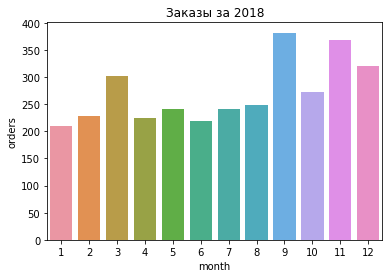

In [220]:
sns.barplot(x="month", y="orders", data=SUM_order7).set_title('Заказы за 2018')

In [221]:
df_merged = SUM_order6.merge(SUM_order7, left_index=True, right_index=True)
df_merged

,year_x,month_x,orders_x,year_y,month_y,orders_y
0,2017,1,154,2018,1,209
1,2017,2,122,2018,2,228
2,2017,3,190,2018,3,302
3,2017,4,186,2018,4,225
4,2017,5,257,2018,5,241
5,2017,6,180,2018,6,220
6,2017,7,201,2018,7,241
7,2017,8,236,2018,8,248
8,2017,9,225,2018,9,382
9,2017,10,231,2018,10,272


In [222]:
df_merged1 = SUM_order4.merge(SUM_order5, left_index=True, right_index=True)
df_merged1

,year_x,month_x,orders_x,year_y,month_y,orders_y
0,2015,1,126,2016,1,86
1,2015,2,84,2016,2,102
2,2015,3,161,2016,3,144
3,2015,4,121,2016,4,159
4,2015,5,146,2016,5,174
5,2015,6,135,2016,6,149
6,2015,7,154,2016,7,128
7,2015,8,145,2016,8,170
8,2015,9,238,2016,9,271
9,2015,10,145,2016,10,153


In [223]:
df_merged2 = df_merged.merge(df_merged1, left_index=True, right_index=True)
df_merged2

,year_x_x,month_x_x,orders_x_x,year_y_x,month_y_x,orders_y_x,year_x_y,month_x_y,orders_x_y,year_y_y,month_y_y,orders_y_y
0,2017,1,154,2018,1,209,2015,1,126,2016,1,86
1,2017,2,122,2018,2,228,2015,2,84,2016,2,102
2,2017,3,190,2018,3,302,2015,3,161,2016,3,144
3,2017,4,186,2018,4,225,2015,4,121,2016,4,159
4,2017,5,257,2018,5,241,2015,5,146,2016,5,174
5,2017,6,180,2018,6,220,2015,6,135,2016,6,149
6,2017,7,201,2018,7,241,2015,7,154,2016,7,128
7,2017,8,236,2018,8,248,2015,8,145,2016,8,170
8,2017,9,225,2018,9,382,2015,9,238,2016,9,271
9,2017,10,231,2018,10,272,2015,10,145,2016,10,153


# Транспортировочный режим <a id='section_id1'></a>

In [226]:
# Сколько заказов отправляют классами 
shipmode = """
            SELECT ship_mode, COUNT(ship_mode) AS amount FROM df GROUP by ship_mode
"""

shipM = ps.sqldf(shipmode)
shipM

,Ship_Mode,amount
0,First Class,1501
1,Same Day,538
2,Second Class,1902
3,Standard Class,5859


Text(0.5, 1.0, 'транпортировочный режим')

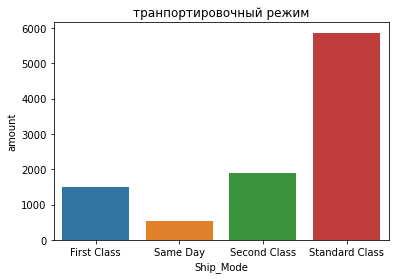

In [227]:
sns.barplot(x="Ship_Mode", y="amount", data=shipM).set_title('транпортировочный режим')

# Клиент <a id='section_id2'></a>


In [224]:
# Сколько уникальных клиентов 
customer = """
            SELECT COUNT(DISTINCT(Customer_ID)) AS уникальных_клиентов FROM df
"""
custoM = ps.sqldf(customer)
custoM

,уникальных_клиентов
0,793


In [225]:
# Сколько уникальных клиентов по штатам 
customer_state = """
            SELECT state, COUNT(DISTINCT(Customer_ID)) AS customers FROM df GROUP BY state
            
"""
custoM_S = ps.sqldf(customer_state)
custoM_S

,State,customers
0,Alabama,34
1,Arizona,99
2,Arkansas,27
3,California,570
4,Colorado,74
5,Connecticut,43
6,Delaware,43
7,District of Columbia,4
8,Florida,178
9,Georgia,80


# Сегмент <a id='section_id3'></a>

In [228]:
# Сколько заказов по сегментам 
name_segment = """
                    SELECT segment, COUNT(segment) AS orders FROM df GROUP BY segment 
"""
n_segment = ps.sqldf(name_segment)
n_segment

,Segment,orders
0,Consumer,5101
1,Corporate,2953
2,Home Office,1746


Text(0.5, 1.0, 'Сегмент по заказам')

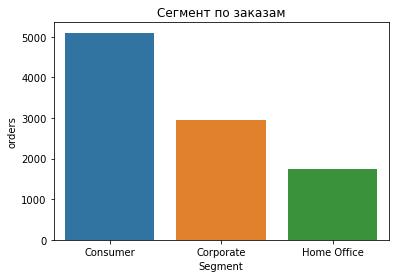

In [229]:
sns.barplot(x="Segment", y="orders", data=n_segment).set_title('Сегмент по заказам')

# Штат <a id='section_id4'></a>

In [230]:
# Какой доход по штатам 
name_state = """
                    SELECT state, SUM(sales) AS доход FROM df GROUP BY state 
"""
n_state = ps.sqldf(name_state)
n_state

,State,доход
0,Alabama,19510.6400
1,Arizona,35272.6570
2,Arkansas,11678.1300
3,California,446306.4635
4,Colorado,31841.5980
5,Connecticut,13384.3570
6,Delaware,27322.9990
7,District of Columbia,2865.0200
8,Florida,88436.5320
9,Georgia,48219.1100


# Категория <a id='section_id5'></a>

In [231]:
# Прибыль по категориям 
category1 = """
                SELECT category, SUM(sales) AS proceeds FROM df GROUP BY category 
"""

categ = ps.sqldf(category1)
categ 

,Category,proceeds
0,Furniture,728658.5757
1,Office Supplies,705422.3340
2,Technology,827455.8730


Text(0.5, 1.0, 'Сегмент по выручки')

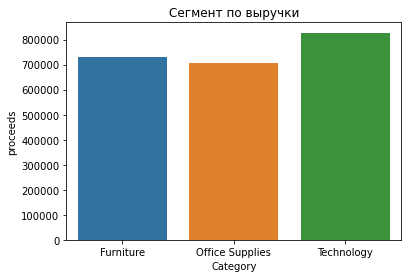

In [232]:
sns.barplot(x="Category", y="proceeds", data=categ).set_title('Сегмент по выручки')

# Товар <a id='section_id6'></a>

In [233]:
# сколько закаов всего 
order1 = """ SELECT  COUNT(Product_ID) AS всего_продуктов  FROM df 

"""

SUM_order = ps.sqldf(order1)
SUM_order

,всего_продуктов
0,9800


In [234]:
# сколько уникальных продуктов всего 
order2 = """ SELECT  COUNT(DISTINCT Product_ID) AS уникальных_продуктов  FROM df 

"""

SUM_order2 = ps.sqldf(order2)
SUM_order2

,уникальных_продуктов
0,1861


# Продажи <a id='section_id7'></a>

In [235]:
sales1 = """
            SELECT  year, SUM(sales)  AS выручка FROM df GROUP BY year

"""

sales2 = ps.sqldf(sales1)
sales2

,year,выручка
0,2015,479856.2081
1,2016,459436.0054
2,2017,600192.5500
3,2018,722052.0192


In [236]:
df['Sales'].sum().round(2)

2261536.78